# 3251 Statistics for Data Science - Term Project
## Flight Delay Analysis
#### Group 13
#### Team Members: Thet Win, Luiz Carvalho, Jasmine Sun, Peony Tam, Richard Taylor
#### Date: April 13, 2025
#### Data Source: https://www.kaggle.com/datasets/shubhamsingh42/flight-delay-dataset-2018-2024/data

#### About the Dataset
The data has been extracted from the Marketing Carrier On-Time Performance (Beginning January 2018) data table of the "On-Time" database from the TranStats data library. The time period is indicated in the name of the compressed file; for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
import shutil
from pathlib import Path
import random
import statistics
import scipy.stats as stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Read data from file
flight_df = pd.read_csv('data/flight_data_2018_2024.csv', sep=',') 

C:\Users\User\AppData\Local\Temp\ipykernel_21168\123952311.py:2: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_df = pd.read_csv('data/flight_data_2018_2024.csv', sep=',')


In [3]:
# Check the data frame
flight_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [4]:
flight_df.info(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582425 entries, 0 to 582424
Data columns (total 120 columns):
 #    Column                                              Dtype  
---   ------                                              -----  
 0    Year                                                int64  
 1    Quarter                                             int64  
 2    Month                                               int64  
 3    DayofMonth                                          int64  
 4    DayOfWeek                                           int64  
 5    FlightDate                                          object 
 6    Marketing_Airline_Network                           object 
 7    Operated_or_Branded_Code_Share_Partners             object 
 8    DOT_ID_Marketing_Airline                            int64  
 9    IATA_Code_Marketing_Airline                         object 
 10   Flight_Number_Marketing_Airline                     int64  
 11   Originally_Scheduled_Cod

In [5]:
flight_df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
count,582425.0,582425.0,582425.0,582425.000000,582425.000000,582425.000000,582425.000000,54.000000,54.000000,582425.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2024.0,1.0,1.0,15.896579,3.803769,19821.876449,2501.993012,20122.537037,5992.277778,19963.143560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.953474,2.012399,281.956020,1684.833888,138.200116,426.557719,376.972882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,20046.000000,3956.000000,19393.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024.0,1.0,1.0,8.000000,2.000000,19790.000000,1146.000000,20046.000000,6059.750000,19790.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024.0,1.0,1.0,16.000000,4.000000,19805.000000,2166.000000,20046.000000,6094.000000,19930.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024.0,1.0,1.0,24.000000,6.000000,19977.000000,3704.000000,20046.000000,6140.750000,20368.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.0,1.0,1.0,31.000000,7.000000,20436.000000,9685.000000,20398.000000,6313.000000,20500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for NULL values in dataset
print(flight_df.isnull().sum())

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
                     ...  
Div5LongestGTime    582425
Div5WheelsOff       582425
Div5TailNum         582425
Duplicate                0
Unnamed: 119        582425
Length: 120, dtype: int64


In [7]:
# Set a threshold of 200000 and drop high NULL counts columns and fill the NULL values with 0
flight_df.dropna(axis=1, inplace=True, thresh=200000)
flight_df.fillna(0, inplace=True)

In [8]:
# Check for NULL values in dataset again
print(flight_df.isnull().sum())

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
                     ..
Flights               0
Distance              0
DistanceGroup         0
DivAirportLandings    0
Duplicate             0
Length: 62, dtype: int64


In [9]:
# Check the dataset again
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582425 entries, 0 to 582424
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Year                                     582425 non-null  int64  
 1   Quarter                                  582425 non-null  int64  
 2   Month                                    582425 non-null  int64  
 3   DayofMonth                               582425 non-null  int64  
 4   DayOfWeek                                582425 non-null  int64  
 5   FlightDate                               582425 non-null  object 
 6   Marketing_Airline_Network                582425 non-null  object 
 7   Operated_or_Branded_Code_Share_Partners  582425 non-null  object 
 8   DOT_ID_Marketing_Airline                 582425 non-null  int64  
 9   IATA_Code_Marketing_Airline              582425 non-null  object 
 10  Flight_Number_Marketing_Airline 

In [10]:
Delays_Airline = flight_df[["ArrDelayMinutes", "Operating_Airline "]]

In [11]:
Delays_Airline.head()

,ArrDelayMinutes,Operating_Airline
0,45.0,G7
1,26.0,G7
2,86.0,G7
3,25.0,G7
4,18.0,G7


In [ ]:
Delays_Airline["type"]="Others"

In [9]:
Delays_Airline = Delays_Airline[Delays_Airline['ArrDelayMinutes'].notna()]

In [10]:
Delays_Airline.loc[(Delays_Airline["Operating_Airline "]=="ZW"), "type"] = "ZW"

In [11]:
Delays_Airline.head()

,ArrDelayMinutes,Operating_Airline,type
0,45.0,G7,Others
1,26.0,G7,Others
2,86.0,G7,Others
3,25.0,G7,Others
4,18.0,G7,Others


In [31]:
# Group Delayed Airlines by Mean values
grouped1 = Delays_Airline.groupby('Operating_Airline ').mean()
grouped1=grouped1.sort_values("ArrDelayMinutes", ascending=False)

In [32]:
grouped1

,ArrDelayMinutes
Operating_Airline,
ZW,54.297899
YV,28.794429
AA,26.171269
F9,23.788441
OO,23.172995
B6,23.131154
OH,22.819667
G4,21.916473
C5,21.015120


# Sampling the data mixing the two types
#### The idea here is that, we will see what is the typical difference between these pairs. If ZW is not particularly bad and this average is some how distorting our perception. We can mix the samples and the difference will fall within typical ranges

In [59]:
Dataset_ZW  = Delays_Airline[Delays_Airline['type']=='ZW']
Dataset_Others = Delays_Airline[Delays_Airline['type']=='Others']
Dataset_ZW     = Dataset_ZW.reset_index(drop=True)
Dataset_Others = Dataset_Others.reset_index(drop=True)
print('Others: ', len(Dataset_Others))
print('ZW    : ', len(Dataset_ZW))

Others:  555063
ZW    :  3652


In [48]:
total_samples=500000
list_diff=[]

for i1 in range (total_samples):
    total1=0
    total2=0
    selected1=[]
    selected2=[]

    # We do not allow repetition in our groups
    while len(selected1)<50:
        r_Others1 = random.randint(0, len(Dataset_Others)-1)
        if  r_Others1 not in selected2:
            selected1.append(r_Others1)
        
    while len(selected2)<5:
        r_ZW1  = random.randint(0, len(Dataset_ZW)-1)
        if r_ZW1 not in selected2:
            selected2.append(r_ZW1)
      
            
    #print(selected1, selected2)
    for r_Others1 in selected1:
        total1=total1+float(Dataset_Others['ArrDelayMinutes'][r_Others1])
    for r_ZW1 in selected2:
        total1=total1+Dataset_ZW['ArrDelayMinutes'][r_ZW1]
        #print(Dataset_water['Response'][r_water1],Dataset_beer['Response'][r_beer1])
        
    selected1=[]
    selected2=[]

    while len(selected1)<50:
        r_Others2 = random.randint(0, len(Dataset_Others)-1)

        if  r_Others2 not in selected2:
            selected1.append(r_Others2)
     
    while len(selected2)<50:
        r_ZW2  = random.randint(0, len(Dataset_ZW)-1)
        if  r_ZW2 not in selected2:
            selected2.append(r_ZW2)
   
            
    #print(selected1, selected2)
    for r_Others2 in selected1:
        total2=total2+Dataset_Others['ArrDelayMinutes'][r_Others2]
    for r_ZW2 in selected2:
        total2=total2+Dataset_ZW['ArrDelayMinutes'][r_ZW2]
        #print(Dataset_water['Response'][r_water1],Dataset_beer['Response'][r_beer1])

    average1 = total1/100
    average2 = total2/100
    diference = average2-average1
    
   
    list_diff.append(diference)


In [60]:
len(list_diff)

500000

In [61]:
X=np.histogram(list_diff, bins=12, range=None, density=None, weights=None)

In [62]:
(X[0], X[1])

(array([    10,    238,   3362,  35016, 153666, 183485,  91204,  26748,
          5288,    847,    123,     13], dtype=int64),
 array([-37.02  , -25.5525, -14.085 ,  -2.6175,   8.85  ,  20.3175,
         31.785 ,  43.2525,  54.72  ,  66.1875,  77.655 ,  89.1225,
        100.59  ]))

In [63]:
quant=X[0]
percent=[]
range1=X[1]
for perc in quant:
    percent.append((perc/total_samples)*100)
for i in range(len(percent)):
    print(round(range1[i],2),'-',round(percent[i],2),'%')


-37.02 - 0.0 %
-25.55 - 0.05 %
-14.08 - 0.67 %
-2.62 - 7.0 %
8.85 - 30.73 %
20.32 - 36.7 %
31.79 - 18.24 %
43.25 - 5.35 %
54.72 - 1.06 %
66.19 - 0.17 %
77.66 - 0.02 %
89.12 - 0.0 %


### All airlines together have the following delays distribution

Text(0, 0.5, 'Frequency')

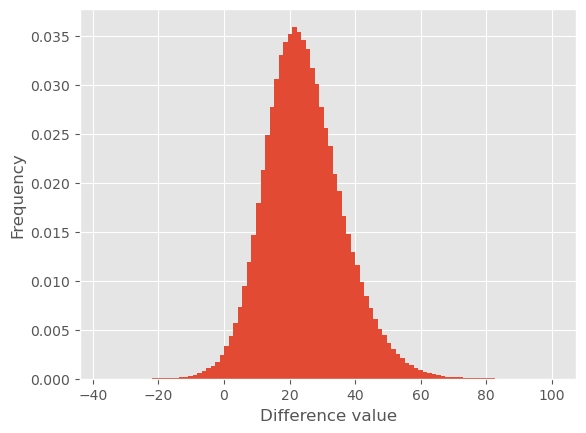

In [64]:
plt.hist(list_diff,density=True ,bins=100)
plt.xlabel("Difference value")
plt.ylabel("Frequency")

In [68]:
mean_all = statistics.mean(list_diff)
std_all  = statistics.stdev(list_diff)
print('Mean: ', mean_all)
print('Std : ', std_all)

Mean:  24.4405012
Std :  11.916031612228013


In [69]:
print(max(list_diff))
print(min(list_diff))

100.59
-37.02


Only 10% of the pairs of samples had the difference above 40, that means that having a difference above 40 between 
two samples is something  rare.
That means the likelihood of this difference between the two groups be 40 is low.

# Testing reversily
#### To make a final verification we are going to select 5000 selections of 10 samples of each group and see how often the difference stays above 40

In [70]:
total_samples2=5000
list_diff_separated=[]

for i1 in range (total_samples2):
    total1=0
    total2=0
    selected1=[]
    selected2=[]

    # We do not allow repetition in our groups
    while len(selected1)<100:
        r_Others1 = random.randint(0, len(Dataset_Others)-1)
        if  r_Others1 not in selected2:
            selected1.append(r_Others1)

    while len(selected2)<100:
        r_ZW1  = random.randint(0, len(Dataset_ZW)-1)
        if r_ZW1 not in selected2:
            selected2.append(r_ZW1)

            
    #print(selected1, selected2)
    for r_Others1 in selected1:
        total1=total1+Dataset_Others['ArrDelayMinutes'][r_Others1]
    for r_ZW1 in selected2:
        total2=total2+Dataset_ZW['ArrDelayMinutes'][r_ZW1]
        #print(Dataset_Others['type'][r_Others1],Dataset_ZW['type'][r_ZW1])
        
  
    average1 = total1/100
    average2 = total2/100
    diference = average2-average1
    
   
    list_diff_separated.append(diference)

In [71]:
mean_all = statistics.mean(list_diff)
std_all  = statistics.stdev(list_diff)
print('Mean: ', mean_all)
print('Std : ', std_all)

Mean:  24.4405012
Std :  11.916031612228013


In [72]:
X_separated=np.histogram(list_diff_separated, bins=12, range=None, density=None, weights=None)

In [73]:
quant=X_separated[0]
percent_separated=[]
range1=X_separated[1]
for perc in quant:
    percent_separated.append((perc/total_samples2)*100)
for i in range(len(percent)):
    print(round(range1[i],2),'-',round(percent_separated[i],2),'%')

-10.04 - 0.18 %
0.19 - 1.56 %
10.42 - 7.34 %
20.65 - 20.12 %
30.88 - 26.16 %
41.11 - 22.56 %
51.35 - 13.06 %
61.58 - 6.18 %
71.81 - 2.06 %
82.04 - 0.58 %
92.27 - 0.16 %
102.5 - 0.04 %


Text(0, 0.5, 'Frequency')

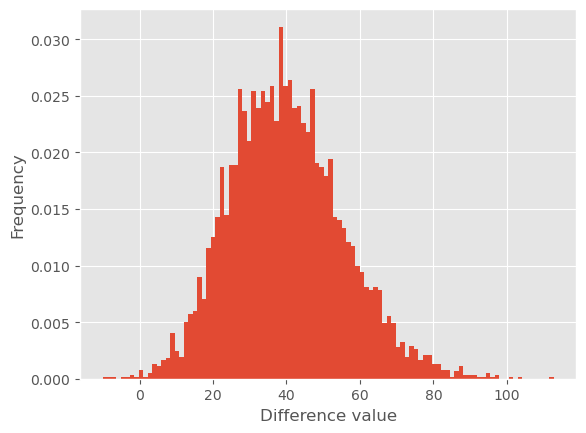

In [74]:
plt.hist(list_diff_separated,density=True ,bins=100)
plt.xlabel("Difference value")
plt.ylabel("Frequency")

In [75]:
X_separated[0].tolist()

[9, 78, 367, 1006, 1308, 1128, 653, 309, 103, 29, 8, 2]

In [76]:
sum(X_separated[0].tolist())

5000

# Visualization all airlines

In [77]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Generate the population
import statistics
mean_population = statistics.mean(list_diff)
stddev_population  = statistics.stdev(list_diff)
print('Mean: ', mean_population)
print('Std : ', stddev_population)
population_size = 1000000
normal_data = np.random.normal(mean_population,stddev_population,population_size)

Mean:  24.4405012
Std :  11.916031612228013


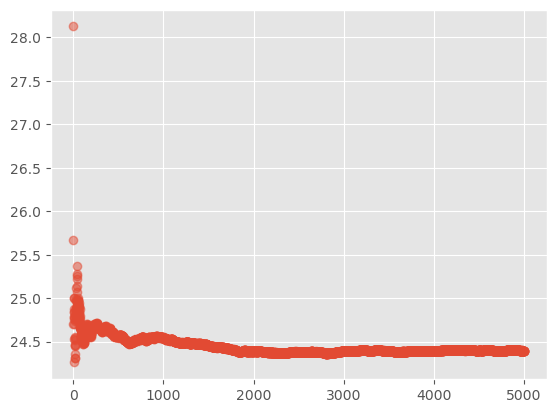

In [78]:
# Take samples from the population
nbr_samples = 5000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_data,(nbr_samples,sample_size),replace = False)

# Generate an array that counts the number of samples taken
sample_number_array=np.arange(1,nbr_samples+1)

# Calculate the rolling average
rolling_average = samples.mean(1).cumsum()/sample_number_array
rolling_average

# Plot the rolling average
plt.scatter(sample_number_array,rolling_average,alpha=0.5,marker=None,linewidths=1)
plt.show()

In [79]:
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma))


population_size = 10000000
normal_population = np.random.normal(mean_population,stddev_population,population_size)

In [80]:
nbr_samples = 10000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_population,(nbr_samples,sample_size),replace = False)
sample_means = samples.mean(1)
sample_means_all = sample_means
sample_size_array=np.arange(1,nbr_samples+1)

Number of data points between mean +/- 1.96 standard deviations: 95 %


(20.0, 80.0)

<Figure size 1500x1000 with 0 Axes>

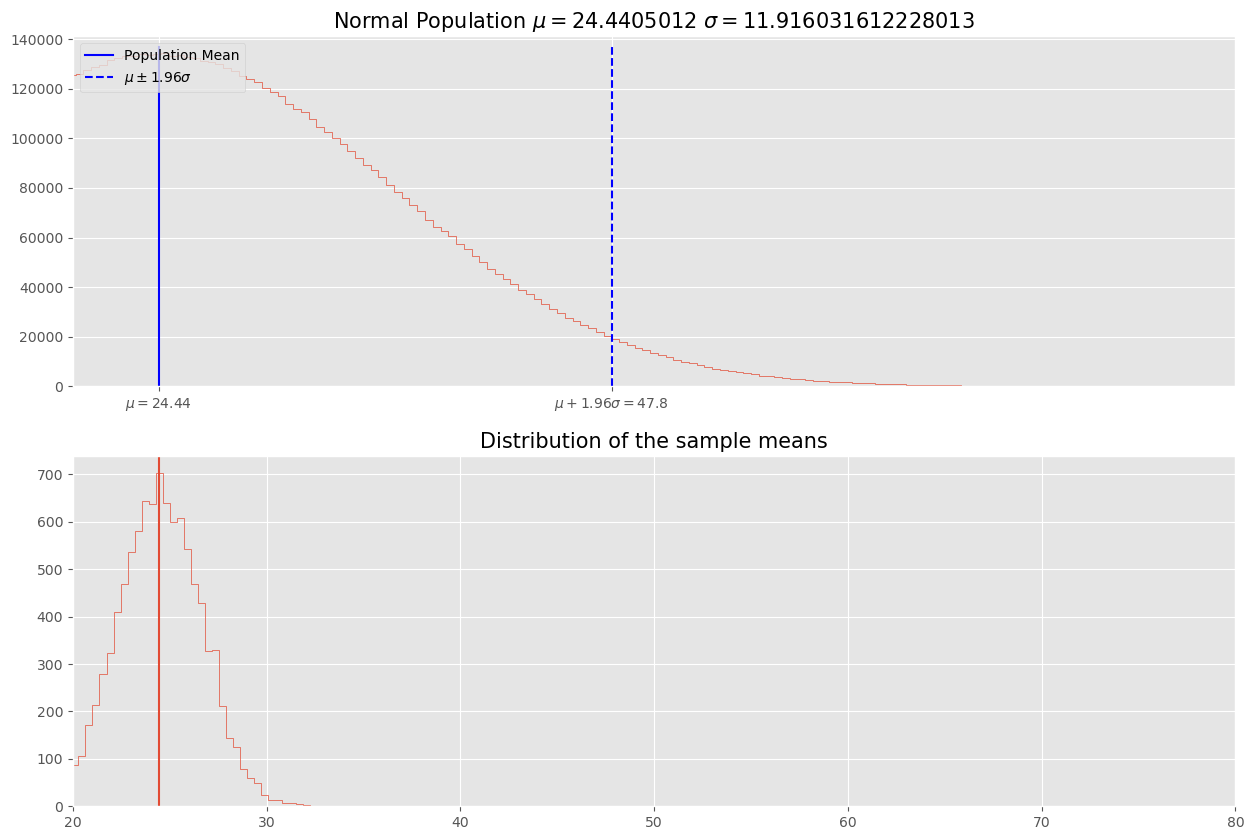

In [81]:
plt.figure(figsize=(15,10))


plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.hist(normal_population,bins=300,histtype='step')

plt.title('Normal Population 'r'$\mu = {}$' r' $ \sigma = {}$'.format(mean_population,stddev_population) 
          ,fontsize = 15)

plt.axvline(normal_population.mean(), color='blue', label='Population Mean',ymax=0.97)
plt.axvline(normal_population.mean()+1.96*normal_population.std(), color='blue', label=r'$\mu \pm 1.96   \sigma$'
            ,ymax=0.97,linestyle = 'dashed')
plt.axvline(normal_population.mean()-1.96*normal_population.std(), color='blue',ymax=0.97,linestyle = 'dashed')

plt.xticks([normal_population.mean(),
            normal_population.mean()+1.96*normal_population.std(),
            normal_population.mean()-1.96*normal_population.std()],
           ['$\mu = {}$'.format(round(normal_population.mean(),2)),
           '$\mu + 1.96 \sigma= {}$'.format(round(normal_population.mean()+1.96*normal_population.std(),2)),
           '$\mu - 1.96 \sigma= {}$'.format(round(normal_population.mean()-1.96*normal_population.std(),2))])
plt.xlim(20,80)
plt.legend(loc=2)


print('Number of data points between mean +/- 1.96 standard deviations:',
      round((abs(normal_population-normal_population.mean())<=
             1.96*normal_population.std()).sum()/normal_population.size*100),'%')


plt.subplot(212)
plt.hist(sample_means,bins=50,histtype='step')
plt.title('Distribution of the sample means', fontsize=15)
plt.axvline(normal_population.mean(),label='Population Mean')
plt.xlim(20,80)

# Visualization on ZW

In [82]:
# Generate the population
import statistics
mean_population = statistics.mean(list_diff_separated)
stddev_population  = statistics.stdev(list_diff_separated)
print('Mean: ', mean_population)
print('Std : ', stddev_population)
population_size = 1000000
normal_data = np.random.normal(mean_population,stddev_population,population_size)

Mean:  40.031456
Std :  15.444108280382498


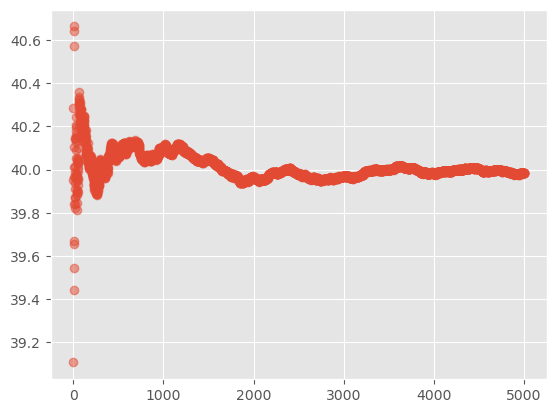

In [83]:
# Take samples from the population
nbr_samples = 5000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_data,(nbr_samples,sample_size),replace = False)

# Generate an array that counts the number of samples taken
sample_number_array=np.arange(1,nbr_samples+1)

# Calculate the rolling average
rolling_average = samples.mean(1).cumsum()/sample_number_array
rolling_average

# Plot the rolling average
plt.scatter(sample_number_array,rolling_average,alpha=0.5,marker=None,linewidths=1)
plt.show()

In [84]:
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma))


population_size = 10000000
normal_population = np.random.normal(mean_population,stddev_population,population_size)

In [85]:
nbr_samples = 10000 # rows
sample_size = 30 # columns
samples = np.random.choice(normal_population,(nbr_samples,sample_size),replace = False)
sample_means = samples.mean(1)
sample_means_ZW = sample_means
sample_size_array=np.arange(1,nbr_samples+1)

Number of data points between mean +/- 1.96 standard deviations: 95 %


(20.0, 80.0)

<Figure size 1500x1000 with 0 Axes>

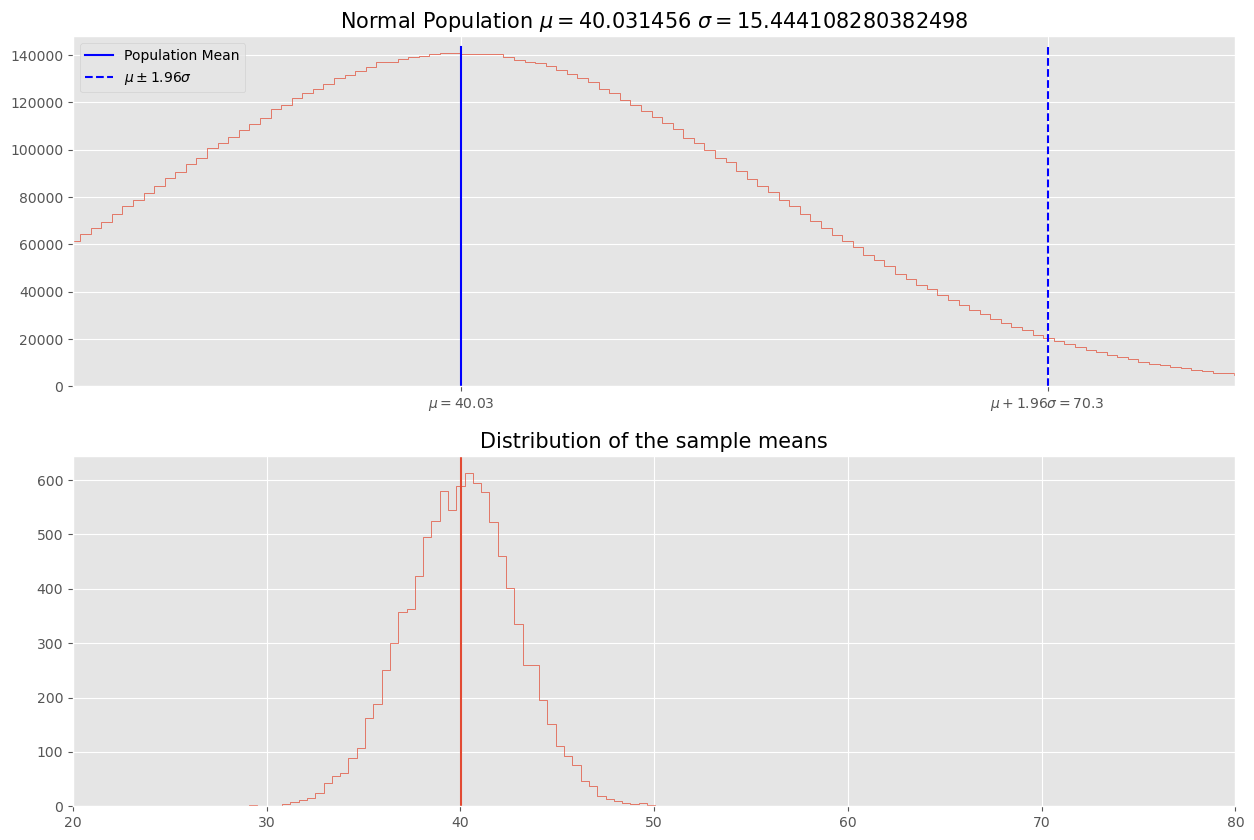

In [86]:
plt.figure(figsize=(15,10))


plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.hist(normal_population,bins=300,histtype='step')

plt.title('Normal Population 'r'$\mu = {}$' r' $ \sigma = {}$'.format(mean_population,stddev_population) 
          ,fontsize = 15)

plt.axvline(normal_population.mean(), color='blue', label='Population Mean',ymax=0.97)
plt.axvline(normal_population.mean()+1.96*normal_population.std(), color='blue', label=r'$\mu \pm 1.96   \sigma$'
            ,ymax=0.97,linestyle = 'dashed')
plt.axvline(normal_population.mean()-1.96*normal_population.std(), color='blue',ymax=0.97,linestyle = 'dashed')

plt.xticks([normal_population.mean(),
            normal_population.mean()+1.96*normal_population.std(),
            normal_population.mean()-1.96*normal_population.std()],
           ['$\mu = {}$'.format(round(normal_population.mean(),2)),
           '$\mu + 1.96 \sigma= {}$'.format(round(normal_population.mean()+1.96*normal_population.std(),2)),
           '$\mu - 1.96 \sigma= {}$'.format(round(normal_population.mean()-1.96*normal_population.std(),2))])
plt.xlim(20,80)
plt.legend(loc=2)


print('Number of data points between mean +/- 1.96 standard deviations:',
      round((abs(normal_population-normal_population.mean())<=
             1.96*normal_population.std()).sum()/normal_population.size*100),'%')


plt.subplot(212)
plt.hist(sample_means,bins=50,histtype='step')
plt.title('Distribution of the sample means', fontsize=15)
plt.axvline(normal_population.mean(),label='Population Mean')
plt.xlim(20,80)

# Visualizing both together

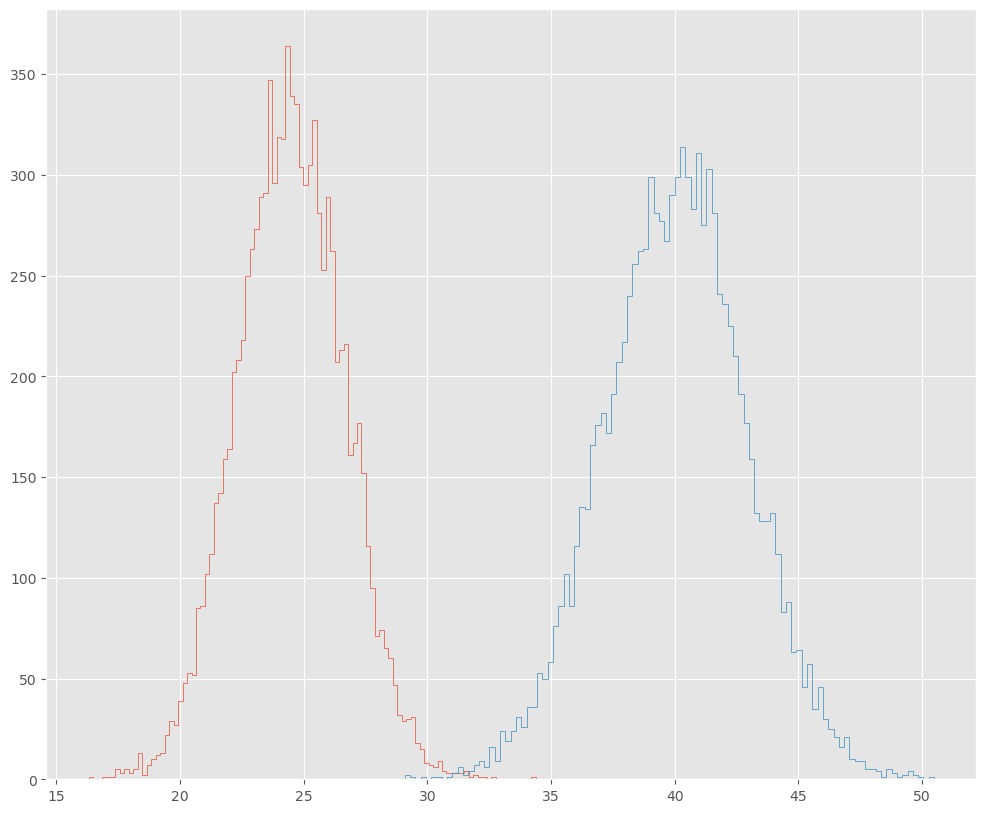

In [90]:
plt.figure(figsize=(12,10))

x1=np.arange(0,50,800)
y1= stats.norm.pdf(np.arange(0,50,800))
#plt.plot(x1,y1)
plt.hist(sample_means_all,bins=100,histtype='step')


x2=np.arange(0,50,800)
y2= stats.norm.pdf(np.arange(0,50,800),loc = 3)
plt.hist(sample_means_ZW,bins=100,histtype='step')


plt.fill_between(x=np.arange(30,32,20), 
                 y1= stats.norm.pdf(np.arange(30,32,20)) ,
                 facecolor='red',
                 alpha=0.5)

As we can see in the graph above, the difference between the delay of all companies and the average (Normal curve blue) spins around the average of 26 with std of 12. On the other hand ZW difference tends to be much bigger, spining around the average of 40 with a std of 15.5. 

## Hypothesis Testing - Could you confirm that the airline ZW is worse in terms of delays than the others with a 90% confidence?

The process here is basically we have two hypothesis:

• The null hypothesis H0: statement about the population assumed to be true unless shown to be incorrect beyond a reasonable doubt.
• The alternate hypothesis HA: claim about the population contradictory to H0 and what we conclude when we reject H0.

We can either:
• "reject H0 in favor of HA" if the sample information favors the alternate hypothesis or
• "do not reject H0" if the sample information favors the null hypothesis, meaning that there is not enough information to reject the null hypothesis

In our specific context the hypotesis are:

H0: The value of 40 of difference  is significant enough to allow us to belive that company ZW has a worse delay problem than most with above 90% confidence

H1: The value of 40 is just a fluke and the population mean remains the same, meaning the company ZW is not as bad in terms of delays.

In [91]:
mean = Delays_Airline['ArrDelayMinutes'].mean()

In [94]:
# Given information
mean = Delays_Airline['ArrDelayMinutes'].mean()
std_dev = Delays_Airline['ArrDelayMinutes'].std()
total_samples = len(Delays_Airline)
new_value =Dataset_ZW['ArrDelayMinutes'].mean()

# Calculate z-score for 14
z_score = (new_value - mean) / std_dev

# Calculate the probability of getting a score less than 15
prob = norm.cdf(z_score)

# Calculate the percentage of securities who got less than 15% return
percent = prob * 100

# Print the result
print("The chance of having a value equal or bellow ",new_value," =>Standard Deviation of ",z_score," x ",std_dev," from the mean of ",mean,":", round(percent, 2), "%")

The chance of having a value equal or bellow  59.44222343921139  =>Standard Deviation of  0.6115125985758184  x  65.2072194844732  from the mean of  19.567187206357445 : 72.96 %


The decision process here is that: Compare the p-value and a present value (called a significance level) to decide whether or not to reject the null hypothesis. Is the probability that the effect (or relation or association) that we want to assess is due to chance alone, or in other words, the probability of a Type I error (rejecting the null hypothesis when the null hypothesis is true).

To calculate p-value we proceed in the following manner:

• p-value is related to the confidence interval CI as

p-value = 1-CI

In our case the CI is 90%

Our p-Value is 1-0.9 = 0.10

Now we have to ask ourselves what is the value in the normal curve that defines 90% will be within and 10% without

1.28 plus/minus std from the mean covers 90% of the events in a normal curve

### That means 1.28 * 65.20 = 83.45 our range will be -63.896 and 103.01 and between these two values we will have 90% of the population

In [95]:
list_delays=Delays_Airline['ArrDelayMinutes'].tolist()

Text(0, 0.5, 'Frequency')

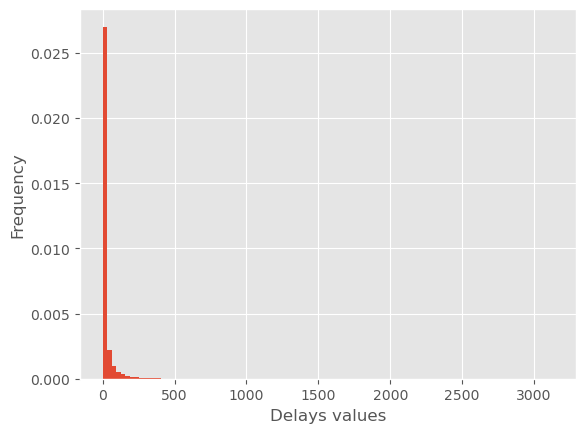

In [98]:
plt.hist(list_delays,density=True ,bins=100)
plt.xlabel("Delays values")
plt.ylabel("Frequency")

# Analysing delays in Arrival and Departure Times

In [34]:
# Select relevant columns
Delays_Departure = flight_df[["DepDelayMinutes", "Origin", "OriginCityName"]]

# Filter out rows with missing delay
Delays_Departure = Delays_Departure[Delays_Departure['DepDelayMinutes'].notna()]

# Group by both Origin and City Name
grouped_departure = Delays_Departure.groupby(['Origin', 'OriginCityName']).mean(numeric_only=True)

# Sort descending by average delay
grouped_departure_sorted = grouped_departure.sort_values("DepDelayMinutes", ascending=False)

# Display results
print("Top 10 Worst Departure Airports (Highest Delay):")
print(grouped_departure_sorted.head(10))

print("\nTop 10 Best Departure Airports (Lowest Delay):")
print(grouped_departure_sorted.tail(10))

Top 10 Worst Departure Airports (Highest Delay):
                                  DepDelayMinutes
Origin OriginCityName                            
CKB    Clarksburg/Fairmont, WV          86.000000
ELM    Elmira/Corning, NY               82.815789
STC    St. Cloud, MN                    71.611111
SMX    Santa Maria, CA                  69.666667
ALO    Waterloo, IA                     64.637931
PSM    Portsmouth, NH                   57.478261
IMT    Iron Mountain/Kingsfd, MI        56.622951
CIU    Sault Ste. Marie, MI             55.491803
CWA    Mosinee, WI                      54.483871
SPI    Springfield, IL                  53.930556

Top 10 Best Departure Airports (Lowest Delay):
                                       DepDelayMinutes
Origin OriginCityName                                 
INL    International Falls, MN                6.941176
ADK    Adak Island, AK                        6.555556
TWF    Twin Falls, ID                         5.370968
FLO    Florence, SC         

In [35]:
# Select relevant columns
Delays_Arrival = flight_df[["ArrDelayMinutes", "Dest", "DestCityName"]]

# Filter out rows with missing arrival delay
Delays_Arrival = Delays_Arrival[Delays_Arrival['ArrDelayMinutes'].notna()]

# Group by both airport code and city name
grouped_arrival = Delays_Arrival.groupby(['Dest', 'DestCityName']).mean(numeric_only=True)

# Sort descending to find worst airports
grouped_arrival_sorted = grouped_arrival.sort_values("ArrDelayMinutes", ascending=False)

# Display results
print("Top 10 Worst Arrival Airports (Highest Delay):")
print(grouped_arrival_sorted.head(10))

print("\nTop 10 Best Arrival Airports (Lowest Delay):")
print(grouped_arrival_sorted.tail(10))


Top 10 Worst Arrival Airports (Highest Delay):
                                   ArrDelayMinutes
Dest DestCityName                                 
MQT  Marquette, MI                       94.710145
CKB  Clarksburg/Fairmont, WV             84.466667
ELM  Elmira/Corning, NY                  68.539474
JLN  Joplin, MO                          57.666667
JST  Johnstown, PA                       49.758065
MBS  Saginaw/Bay City/Midland, MI        49.579268
IMT  Iron Mountain/Kingsfd, MI           49.557377
RST  Rochester, MN                       46.343949
LAN  Lansing, MI                         45.243243
CSG  Columbus, GA                        44.573171

Top 10 Best Arrival Airports (Lowest Delay):
                                     ArrDelayMinutes
Dest DestCityName                                   
PGV  Greenville, NC                         4.423529
HGR  Hagerstown, MD                         4.411765
LBL  Liberal, KS                            4.363636
ADK  Adak Island, AK          

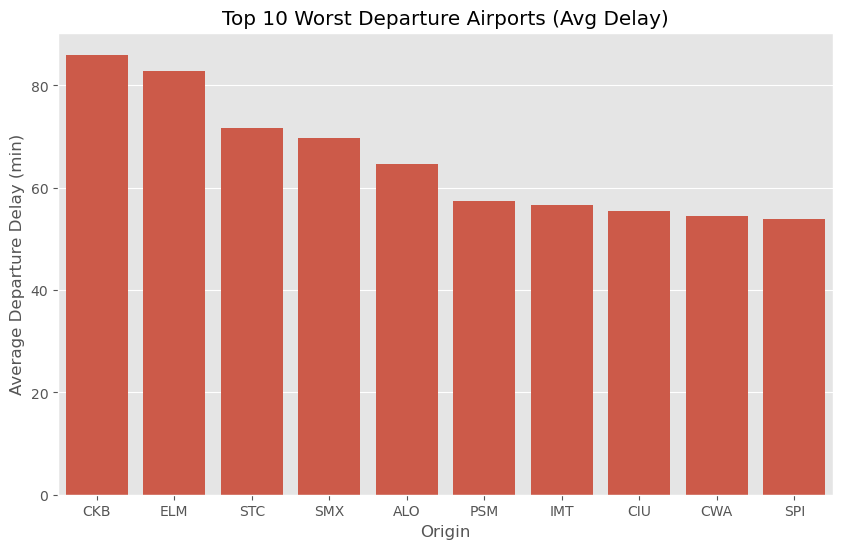

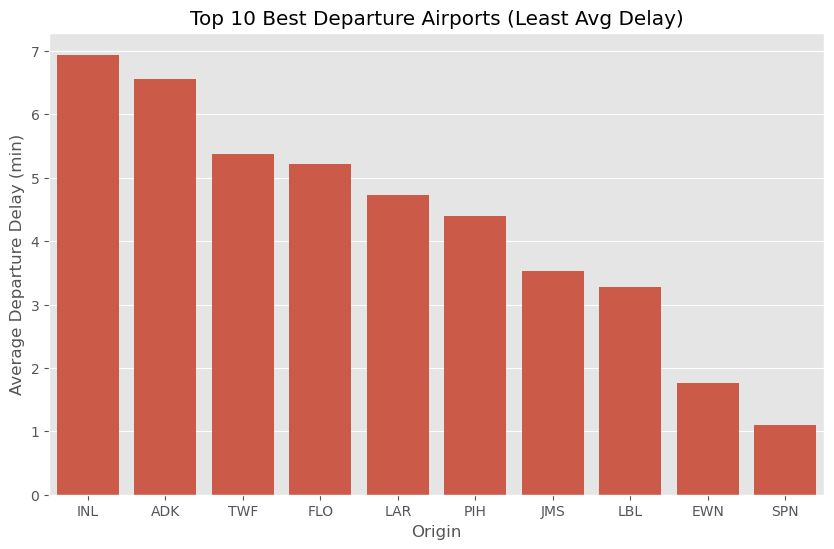

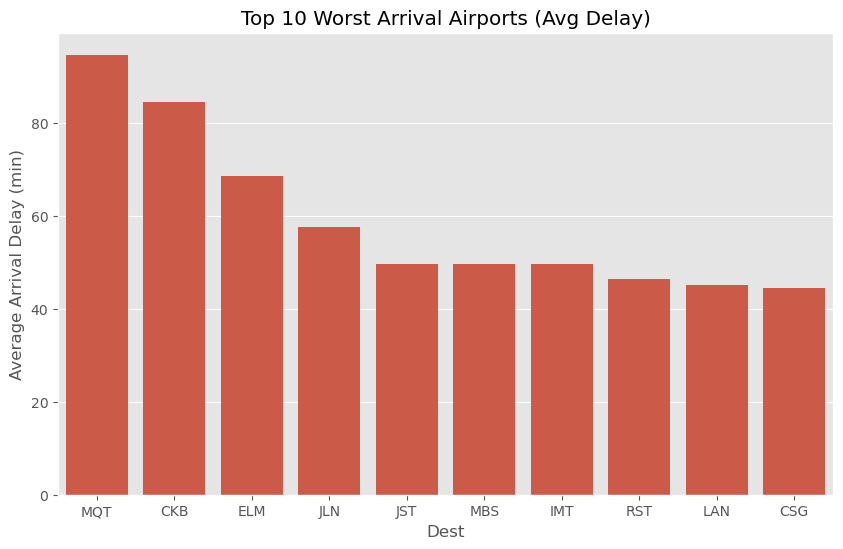

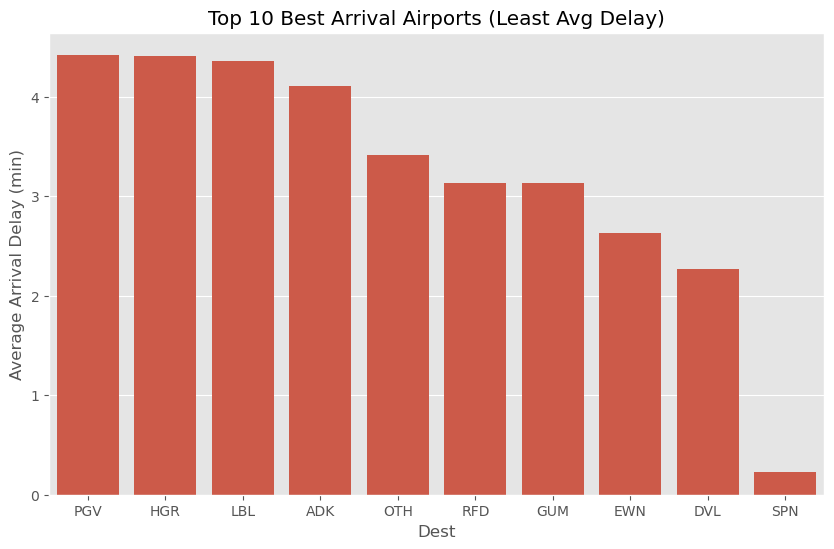

In [36]:
# Top 10 worst for departure
top_departure = grouped_departure_sorted.head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_departure, x="Origin", y="DepDelayMinutes")
plt.title("Top 10 Worst Departure Airports (Avg Delay)")
plt.ylabel("Average Departure Delay (min)")
plt.show()

# Top 10 best for departure airports
top_departure_best = grouped_departure_sorted.tail(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_departure_best, x="Origin", y="DepDelayMinutes")
plt.title("Top 10 Best Departure Airports (Least Avg Delay)")
plt.ylabel("Average Departure Delay (min)")
plt.show()

# Top 10 worst for arrival
top_arrival = grouped_arrival_sorted.head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_arrival, x="Dest", y="ArrDelayMinutes")
plt.title("Top 10 Worst Arrival Airports (Avg Delay)")
plt.ylabel("Average Arrival Delay (min)")
plt.show()

# Top 10 best for arrival
top_arrival_best = grouped_arrival_sorted.tail(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_arrival_best, x="Dest", y="ArrDelayMinutes")
plt.title("Top 10 Best Arrival Airports (Least Avg Delay)")
plt.ylabel("Average Arrival Delay (min)")
plt.show()

Correlation between Departure Delay and TaxiOut Time: 0.091
Correlation between Arrival Delay and TaxiIn Time: 0.097


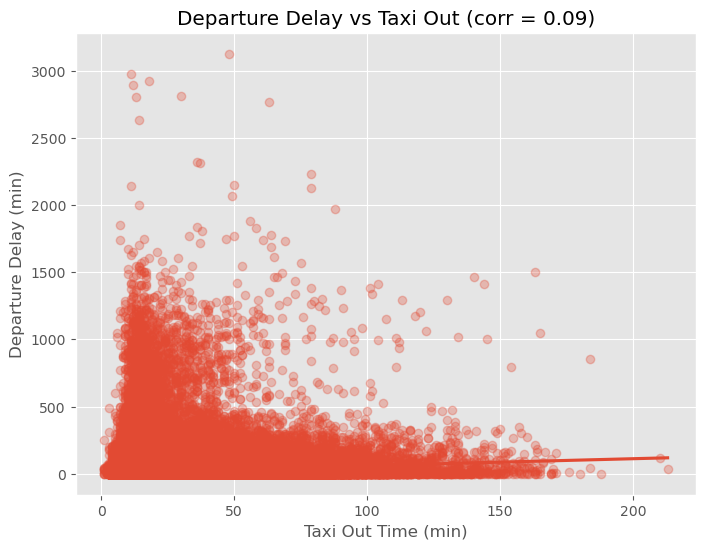

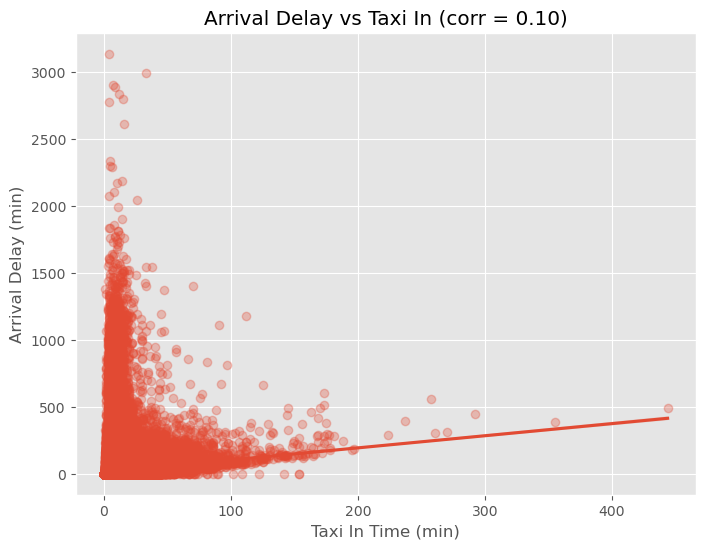

In [37]:
# --- Clean Data ---
df = flight_df[flight_df['Cancelled'] != 1]
df = df[['DepDelayMinutes', 'ArrDelayMinutes', 'TaxiOut', 'TaxiIn']]

# Drop missing or invalid values
df = df.dropna()
df = df[(df['DepDelayMinutes'] >= 0) & (df['ArrDelayMinutes'] >= 0)]
df = df[(df['TaxiOut'] >= 0) & (df['TaxiIn'] >= 0)]

# --- Correlation ---
cor_dep = df['DepDelayMinutes'].corr(df['TaxiOut'])
cor_arr = df['ArrDelayMinutes'].corr(df['TaxiIn'])

print(f"Correlation between Departure Delay and TaxiOut Time: {cor_dep:.3f}")
print(f"Correlation between Arrival Delay and TaxiIn Time: {cor_arr:.3f}")

# --- Scatterplots ---
# Departure Delay vs TaxiOut
plt.figure(figsize=(8,6))
sns.regplot(x='TaxiOut', y='DepDelayMinutes', data=df, scatter_kws={'alpha':0.3})
plt.title(f'Departure Delay vs Taxi Out (corr = {cor_dep:.2f})')
plt.xlabel('Taxi Out Time (min)')
plt.ylabel('Departure Delay (min)')
plt.grid(True)
plt.show()

# Arrival Delay vs TaxiIn
plt.figure(figsize=(8,6))
sns.regplot(x='TaxiIn', y='ArrDelayMinutes', data=df, scatter_kws={'alpha':0.3})
plt.title(f'Arrival Delay vs Taxi In (corr = {cor_arr:.2f})')
plt.xlabel('Taxi In Time (min)')
plt.ylabel('Arrival Delay (min)')
plt.grid(True)
plt.show()

# Analysing Average Delays

In [18]:
# Filter out cancelled flights 
df = flight_df[flight_df['Cancelled'] != 1]
delay_columns = df[["ArrDelayMinutes", "DepDelayMinutes", "DayOfWeek", "DayofMonth"]]
delay_data = delay_columns[delay_columns['DepDelayMinutes'].notna()]
delay_data = delay_columns[delay_columns['ArrDelayMinutes'].notna()]
delay_data.head()

,ArrDelayMinutes,DepDelayMinutes,DayOfWeek,DayofMonth
0,45.0,71.0,7,14
1,26.0,0.0,7,14
2,86.0,74.0,7,14
3,25.0,0.0,7,14
4,18.0,33.0,7,14


# Analysing Average Delays by Days of the Week 

In [19]:
# group by DayOfWeek
mean_week = delay_data.groupby('DayOfWeek').mean()

# Dataframes for Arrival and Departure
arr_week_sorted = mean_week.sort_values("ArrDelayMinutes", ascending=False)
dep_week_sorted = mean_week.sort_values("DepDelayMinutes", ascending=False)


In [20]:
# Check Arrival dataframe (Days of the Week)
arr_week_sorted.head()

,ArrDelayMinutes,DepDelayMinutes,DayofMonth
DayOfWeek,,,
2,25.541441,24.291668,15.587131
1,22.821493,21.948858,15.170704
5,21.782627,20.775231,15.593828
7,19.129519,19.120544,17.648545
6,18.601186,18.018917,16.329807


In [21]:
# Check Departure dataframe (Days of the Week)
dep_week_sorted.head()

,ArrDelayMinutes,DepDelayMinutes,DayofMonth
DayOfWeek,,,
2,25.541441,24.291668,15.587131
1,22.821493,21.948858,15.170704
5,21.782627,20.775231,15.593828
7,19.129519,19.120544,17.648545
6,18.601186,18.018917,16.329807


# Analysing Average Delays by Month of the Week

In [22]:
# group by DayofMonth
mean_month = delay_data.groupby('DayofMonth').mean()

# Dataframes for Arrival and Departure
arr_month_sorted = mean_month.sort_values("ArrDelayMinutes", ascending=False)
dep_month_sorted = mean_month.sort_values("DepDelayMinutes", ascending=False)

In [23]:
# Check Arrival dataframe (Month of the Week)
arr_month_sorted.head()

,ArrDelayMinutes,DepDelayMinutes,DayOfWeek
DayofMonth,,,
15,55.640354,51.199407,1.0
16,53.658098,50.980115,2.0
9,45.782125,41.470066,2.0
14,33.383523,31.841980,7.0
19,33.119602,30.193851,5.0


In [24]:
# Check Departure dataframe (Month of the Week)
dep_month_sorted.head()

,ArrDelayMinutes,DepDelayMinutes,DayOfWeek
DayofMonth,,,
15,55.640354,51.199407,1.0
16,53.658098,50.980115,2.0
9,45.782125,41.470066,2.0
14,33.383523,31.841980,7.0
12,32.753872,30.507858,5.0


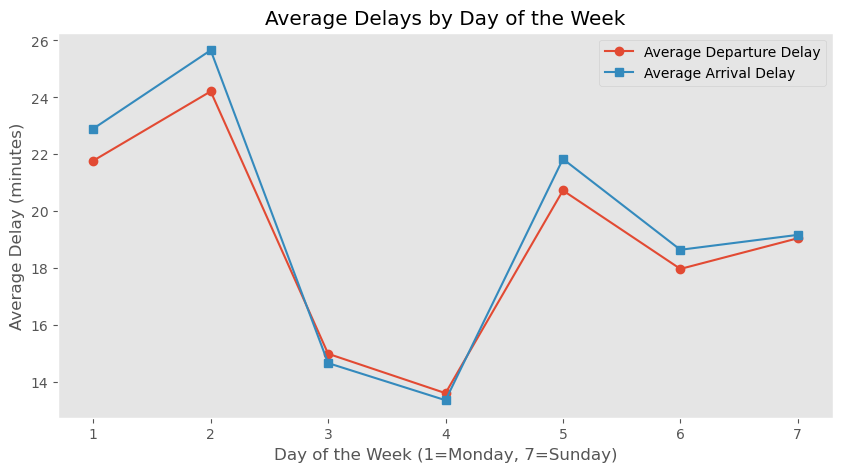

In [107]:
# Plot the results for delay vs days of week
plt.figure(figsize=(10, 5))
plt.plot(mean_week.index, mean_week['DepDelayMinutes'], marker='o', label='Average Departure Delay')
plt.plot(mean_week.index, mean_week['ArrDelayMinutes'], marker='s', label='Average Arrival Delay')

# Formatting the plot
plt.xlabel('Day of the Week (1=Monday, 7=Sunday)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Day of the Week')
plt.legend()
plt.grid()
plt.show()

We can see a slight negative slope here, leading me to hypothesize that there may be a negative correlation here. 

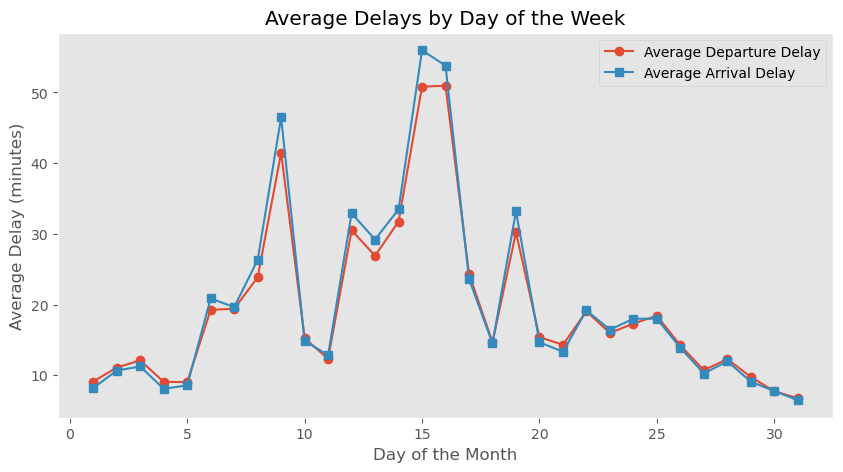

In [108]:
# Plot the results for delay vs days of month
plt.figure(figsize=(10, 5))
plt.plot(mean_month.index, mean_month['DepDelayMinutes'], marker='o', label='Average Departure Delay')
plt.plot(mean_month.index, mean_month['ArrDelayMinutes'], marker='s', label='Average Arrival Delay')

# Formatting the plot
plt.xlabel('Day of the Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Day of the Week')
plt.legend()
plt.grid()
plt.show()

There appears to be an incresae in Delays around middle of the month.

In [26]:
cor_dep_week = df['DepDelayMinutes'].corr(df['DayOfWeek'])
cor_arr_week = df['ArrDelayMinutes'].corr(df['DayOfWeek']) 

print(f"Correlation between Departure Delay and Day of the Week: {cor_dep_week:.3f}")
print(f"Correlation between Arrival Delay and Day of the Week: {cor_arr_week:.3f}")

Correlation between Departure Delay and Day of the Week: -0.018
Correlation between Arrival Delay and Day of the Week: -0.021


In [27]:
cor_dep_month = df['DepDelayMinutes'].corr(df['DayofMonth'])
cor_arr_month = df['ArrDelayMinutes'].corr(df['DayofMonth'])

print(f"Correlation between Departure Delay and Day of the Month: {cor_dep_month:.3f}")
print(f"Correlation between Arrival Delay and Day of the Month: {cor_arr_month:.3f}")

Correlation between Departure Delay and Day of the Month: -0.020
Correlation between Arrival Delay and Day of the Month: -0.023


We can see that there is a negative correlation in both delay vs days of the week as well as delay vs days of the month. This means, as the week goes on or as the month goes on, there is a higher chance of a delay.

There is, however, no significant correlation in terms of delay vs time of the year, since all are relatively small. 

We can thus conclude that there isn't that high of a correlation in terms of delays compared to the time of year it is at. 

## Regression Testing

In [12]:
df = flight_df.copy()

In [14]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,Duplicate
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,0.0,0.0,104.0,78.0,48.0,1.0,209.0,1,0,N
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,0.0,0.0,79.0,106.0,41.0,1.0,212.0,1,0,N
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,0.0,0.0,76.0,88.0,41.0,1.0,209.0,1,0,N
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,0.0,0.0,88.0,113.0,51.0,1.0,258.0,2,0,N
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,0.0,0.0,123.0,108.0,83.0,1.0,696.0,3,0,N


In [15]:

print("Original dataset shape:", df.shape)

# Filter for Airline ZW and non-cancelled, non-diverted flights
df_zw = df[
    (df['IATA_Code_Marketing_Airline'] == 'ZW') &
    (df['Cancelled'] == 0) &
    (df['Diverted'] == 0)
]
print("Filtered ZW flights shape:", df_zw.shape)

# Keep only rows with target defined
df_zw = df_zw[df_zw['ArrDel15'].notna()]
print("After removing rows with missing ArrDel15:", df_zw.shape)

# Select predictors
features = ['Month', 'DayOfWeek', 'CRSDepTime', 'Distance', 'Origin', 'Dest']
df_model = df_zw[features + ['ArrDel15']].copy()

# Drop any remaining missing values
df_model.dropna(inplace=True)
print("After dropping NA in selected features:", df_model.shape)

# Check if the DataFrame is empty before continuing
if df_model.empty:
    print("No data available after filtering and cleaning.")
else:
    # Encode categorical features
    label_enc = LabelEncoder()
    df_model['Origin'] = label_enc.fit_transform(df_model['Origin'])
    df_model['Dest'] = label_enc.fit_transform(df_model['Dest'])

    # Separate features and target
    X = df_model[features]
    y = df_model['ArrDel15']

    # Standardize numeric features
    scaler = StandardScaler()
    numeric_features = ['Month', 'DayOfWeek', 'CRSDepTime', 'Distance']
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Original dataset shape: (582425, 62)
Filtered ZW flights shape: (0, 62)
After removing rows with missing ArrDel15: (0, 62)
After dropping NA in selected features: (0, 7)
No data available after filtering and cleaning.


After applying the necessary filters to focus on Airline ZW and removing records that were cancelled, diverted, or containing missing values in key fields, the dataset was found to contain no usable records for analysis. This outcome points to either limited data availability for the specified airline or data completeness issues that impacted the model’s input requirements.
As a result, the logistic regression analysis could not be completed. Future analysis may consider expanding the scope to other airlines, adjusting data quality thresholds, or employing data imputation techniques to improve the robustness and usability of the dataset for predictive modeling.